# Preprocess 

In [1]:
%pip install spacy
!python -m spacy download en_core_web_sm
%pip install seaborn
%pip install matplotlib
%pip install scipy


Note: you may need to restart the kernel to use updated packages.

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/local/Cellar/python@3.10/3.10.17/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 187, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/usr/local/Cellar/python@3.10/3.10.17/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 146, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/usr/local/Cellar/python@3.10/3.10.17/

In [2]:
import pandas as pd
from collections import Counter
import spacy
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/local/Cellar/python@3.10/3.10.17/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/Cellar/python@3.10/3.10.17/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/andrea/Documents/MUIRST/ABID/Reto2/bert_env/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File 

In [3]:
data = pd.read_csv("../../data/processed/data_limpieza_v1.csv")
data

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map
0,81f884c64a7,1,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,president-elect,new_york,republican,republican,political-affiliation
1,30c2723a188,0,With the resources it takes to execute just ov...,health-care,chris-dodd,u.s. senator,connecticut,democrat,democrat,political-affiliation
2,6936b216e5d,0,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,political commentator,washington_dc,democrat,democrat,political-affiliation
3,b5cd9195738,1,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,non-define,non-define,none,none,other-political-groups
4,84f8dac7737,0,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,non-define,wisconsin,republican,republican,political-affiliation
...,...,...,...,...,...,...,...,...,...,...
8945,44edff2b865,1,If Rhode Island does a hybrid [retirement] pla...,"pensions,public-service,retirement,workers",lincoln-chafee,non-define,rhode_island,democrat,democrat,political-affiliation
8946,4a63b5f9c16,1,The new health care law will force seniors int...,"medicare,message-machine,retirement",dan-coats,non-define,indiana,republican,republican,political-affiliation
8947,7c57fa8e81c,0,The health insurance plan that (members of Con...,health-care,steve-southerland,"u.s. representative, florida district 2",florida,republican,republican,political-affiliation
8948,2375e3cf4b7,1,No one in American history has moved from a Ju...,"elections,history",newt-gingrich,"co-host on cnn's ""crossfire""",georgia,republican,republican,political-affiliation


In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
data = data.map(lambda x: x.lower() if isinstance(x, str) else x)
data

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map
0,81f884c64a7,1,china is in the south china sea and (building)...,"china,foreign-policy,military",donald-trump,president-elect,new_york,republican,republican,political-affiliation
1,30c2723a188,0,with the resources it takes to execute just ov...,health-care,chris-dodd,u.s. senator,connecticut,democrat,democrat,political-affiliation
2,6936b216e5d,0,the (wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,political commentator,washington_dc,democrat,democrat,political-affiliation
3,b5cd9195738,1,says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,non-define,non-define,none,none,other-political-groups
4,84f8dac7737,0,at protests in wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,non-define,wisconsin,republican,republican,political-affiliation
...,...,...,...,...,...,...,...,...,...,...
8945,44edff2b865,1,if rhode island does a hybrid [retirement] pla...,"pensions,public-service,retirement,workers",lincoln-chafee,non-define,rhode_island,democrat,democrat,political-affiliation
8946,4a63b5f9c16,1,the new health care law will force seniors int...,"medicare,message-machine,retirement",dan-coats,non-define,indiana,republican,republican,political-affiliation
8947,7c57fa8e81c,0,the health insurance plan that (members of con...,health-care,steve-southerland,"u.s. representative, florida district 2",florida,republican,republican,political-affiliation
8948,2375e3cf4b7,1,no one in american history has moved from a ju...,"elections,history",newt-gingrich,"co-host on cnn's ""crossfire""",georgia,republican,republican,political-affiliation


## Statement

### Tokenizar, estities y stopwords por statemen 

In [6]:
# Función para procesar el statement y extraer las métricas
def process_statement(statement):
    # Procesar el texto con spaCy
    doc = nlp(statement.lower()) #Convertimos todos los tokens a minusculas
    # Número de tokens
    num_tokens = len(doc)
    # Número de oraciones
    num_sentences = len(list(doc.sents))
    # Extraer POS tags, lemas y profundidad (depth)
    pos_info = []
    for token in doc:
        pos_info.append({
            'lemma': token.lemma_,
            'pos': token.pos_,
            'tag': token.tag_,
            'depth': token.dep_,
        })
    
    # Frecuencia de POS tags, lemas, etc.
    pos_freq = Counter([token['pos'] for token in pos_info])  # Frecuencia de POS tags
    lemma_freq = Counter([token['lemma'] for token in pos_info])  # Frecuencia de lemas
    tag_freq = Counter([token['tag'] for token in pos_info])  # Frecuencia de tags

    # Extraer las entidades, tipos y explicaciones
    entidades = []
    tipos = []
    explicaciones = []
    
    for ent in doc.ents:
        entidades.append(ent.text)
        tipos.append(ent.label_)
        explicaciones.append(spacy.explain(ent.label_))
    
    # ===================== Entities =======================================================
    # Crear un DataFrame para las entidades
    entities_df = pd.DataFrame({
        "Entidad": entidades,
        "Tipo de Entidad": tipos,
        "Explicación": explicaciones
    })

    # ===================== Stopwords =======================================================
    # Extracción de stopwords
    stopwords = nlp.Defaults.stop_words
    stopwords_in_statement = [token.text for token in doc if token.is_stop]
    
    # Filtrar los tokens que no son stopwords
    tokens_without_stopwords = [token for token in doc if not token.is_stop and not token.is_digit and not token.is_punct and token.text != '-' and token.text != '_']
    
    # Generar el statement sin stopwords
    statement_without_stopwords = ' '.join([token.text for token in tokens_without_stopwords])
    
    # Calcular las métricas para el statement sin stopwords
    num_tokens_without_stopwords = len(tokens_without_stopwords)
    
    # Extraer POS tags, lemas y profundidad para el statement sin stopwords
    pos_info_without_stopwords = []
    for token in tokens_without_stopwords:
        pos_info_without_stopwords.append({
            'lemma': token.lemma_,
            'pos': token.pos_,
            'tag': token.tag_,
            'depth': token.dep_,
        })
    
    # Frecuencia de POS tags, lemas, etc. para el statement sin stopwords
    pos_freq_without_stopwords = Counter([token['pos'] for token in pos_info_without_stopwords])  # Frecuencia de POS tags
    lemma_freq_without_stopwords = Counter([token['lemma'] for token in pos_info_without_stopwords])  # Frecuencia de lemas
    tag_freq_without_stopwords = Counter([token['tag'] for token in pos_info_without_stopwords])  # Frecuencia de tags
    
    # Retornar los resultados
    return (
        ' '.join([token.text for token in doc]), 
        num_tokens, 
        num_sentences, 
        pos_info, 
        pos_freq, 
        lemma_freq, 
        tag_freq, 
        entities_df, 
        stopwords_in_statement, 
        statement_without_stopwords, 
        num_tokens_without_stopwords, 
        pos_info_without_stopwords, 
        pos_freq_without_stopwords, 
        lemma_freq_without_stopwords, 
        tag_freq_without_stopwords
    )

In [7]:
data[['statement_tokens', 'num_tokens', 'num_sentences', 'pos_info', 'pos_freq', 'lemma_freq', 'tag_freq',
    'entities', 'stopwords', 'statement_tokens_without_stopwords', 'num_tokens_without_stopwords', 
    'pos_info_without_stopwords', 'pos_freq_without_stopwords', 'lemma_freq_without_stopwords', 
    'tag_freq_without_stopwords']] = data['statement'].apply(lambda x: pd.Series(process_statement(x)))

In [8]:
data.head(5)

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,...,lemma_freq,tag_freq,entities,stopwords,statement_tokens_without_stopwords,num_tokens_without_stopwords,pos_info_without_stopwords,pos_freq_without_stopwords,lemma_freq_without_stopwords,tag_freq_without_stopwords
0,81f884c64a7,1,china is in the south china sea and (building)...,"china,foreign-policy,military",donald-trump,president-elect,new_york,republican,republican,political-affiliation,...,"{'china': 2, 'be': 1, 'in': 1, 'the': 3, 'sout...","{'NNP': 4, 'VBZ': 2, 'IN': 2, 'DT': 3, 'CC': 1...",Entidad Tipo de Entidad Expli...,"[is, in, the, and, the, of, which, perhaps, th...",china south china sea building)a military fort...,10,"[{'lemma': 'china', 'pos': 'PROPN', 'tag': 'NN...","{'PROPN': 4, 'NOUN': 4, 'ADJ': 1, 'VERB': 1}","{'china': 2, 'south': 1, 'sea': 1, 'building)a...","{'NNP': 4, 'NN': 3, 'JJ': 1, 'NNS': 1, 'VBN': 1}"
1,30c2723a188,0,with the resources it takes to execute just ov...,health-care,chris-dodd,u.s. senator,connecticut,democrat,democrat,political-affiliation,...,"{'with': 1, 'the': 3, 'resource': 1, 'it': 1, ...","{'IN': 5, 'DT': 3, 'NNS': 3, 'PRP': 2, 'VBZ': ...",Entidad Tipo de Entidad \ 0...,"[with, the, it, to, just, over, three, of, the...",resources takes execute months iraq war fully ...,15,"[{'lemma': 'resource', 'pos': 'NOUN', 'tag': '...","{'NOUN': 7, 'VERB': 4, 'PROPN': 2, 'ADV': 1, '...","{'resource': 1, 'take': 1, 'execute': 1, 'mont...","{'NNS': 3, 'VBZ': 1, 'VB': 2, 'NNP': 2, 'NN': ..."
2,6936b216e5d,0,the (wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,political commentator,washington_dc,democrat,democrat,political-affiliation,...,"{'the': 1, '(': 1, 'wisconsin': 1, ')': 1, 'go...","{'DT': 1, '-LRB-': 1, 'NNP': 1, '-RRB-': 1, 'N...",Entidad Tipo de Entidad ...,"[the, has, to]",wisconsin governor proposed tax giveaways corp...,6,"[{'lemma': 'wisconsin', 'pos': 'PROPN', 'tag':...","{'PROPN': 1, 'NOUN': 4, 'VERB': 1}","{'wisconsin': 1, 'governor': 1, 'propose': 1, ...","{'NNP': 1, 'NN': 2, 'VBN': 1, 'NNS': 2}"
3,b5cd9195738,1,says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,non-define,non-define,none,none,other-political-groups,...,"{'say': 1, 'her': 1, 'representation': 1, 'of'...","{'VBZ': 2, 'PRP$': 2, 'NN': 10, 'IN': 3, 'DT':...","Empty DataFrame Columns: [Entidad, Tipo de Ent...","[her, of, an, who, was, then, my, in, a, is, s...",says representation ex boyfriend friend family...,11,"[{'lemma': 'say', 'pos': 'VERB', 'tag': 'VBZ',...","{'VERB': 1, 'NOUN': 9, 'ADJ': 1}","{'say': 1, 'representation': 1, 'ex': 1, 'boyf...","{'VBZ': 1, 'NN': 8, 'NNS': 1, 'JJ': 1}"
4,84f8dac7737,0,at protests in wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,non-define,wisconsin,republican,republican,political-affiliation,...,"{'at': 1, 'protest': 1, 'in': 1, 'wisconsin': ...","{'IN': 3, 'NNS': 4, 'NN': 3, 'VBN': 2, 'JJ': 3...",Entidad Tipo de Entidad Ex...,"[at, in, against, were, out, to]",protests wisconsin proposed collective bargain...,14,"[{'lemma': 'protest', 'pos': 'NOUN', 'tag': 'N...","{'NOUN': 7, 'VERB': 4, 'ADJ': 3}","{'protest': 1, 'wisconsin': 1, 'propose': 1, '...","{'NNS': 4, 'NN': 3, 'VBN': 2, 'JJ': 3, 'VB': 1..."


In [9]:
print('Number of words description')
print(data['num_tokens'].describe())
print()

Number of words description
count    8950.000000
mean       20.810838
std        13.179739
min         2.000000
25%        14.000000
50%        19.000000
75%        26.000000
max       789.000000
Name: num_tokens, dtype: float64



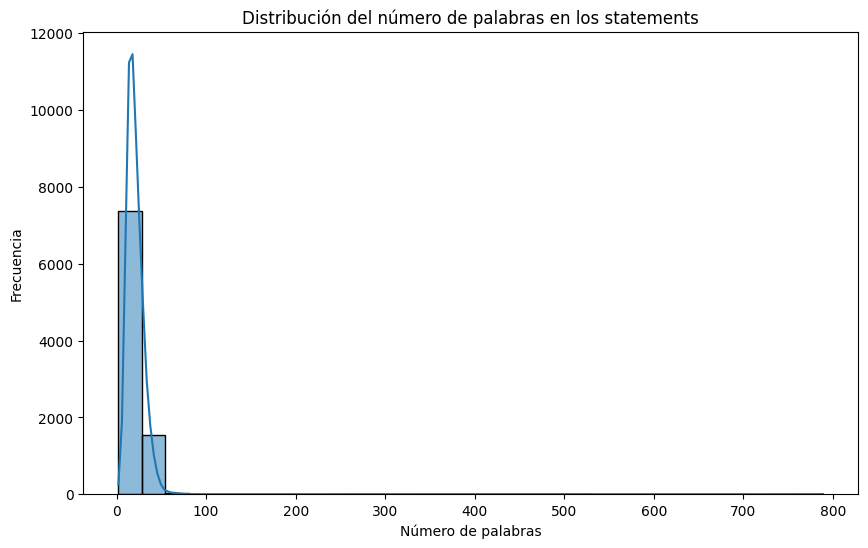

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['num_tokens'], kde=True, bins=30)
plt.title('Distribución del número de palabras en los statements')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

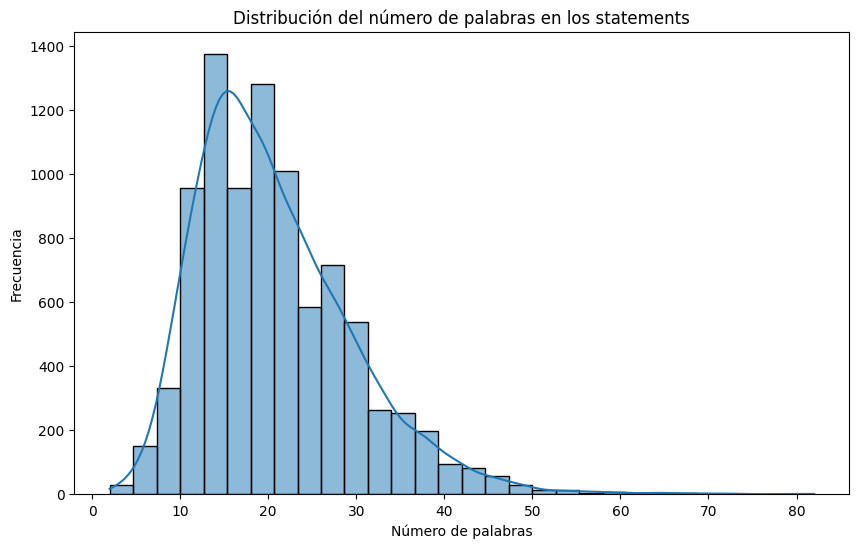

In [11]:
# Quitando los dos atipicos
max_words = 100

# Filtramos los datos para excluir las palabras extremas
filtered_data = data[data['num_tokens'] <= max_words]

# Graficamos el histograma con una curva KDE
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['num_tokens'], kde=True, bins=30)
plt.title('Distribución del número de palabras en los statements')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()


In [12]:
print("\nStatements with greater number of words:")
print(data.nlargest(10, 'num_tokens')[['statement', 'num_tokens']])



Statements with greater number of words:
                                              statement  num_tokens
3671  hospitals, doctors, mris, surgeries and so for...         789
5443  the vast majority of the money i got was from ...         527
4049  barbara buono by the numbers: as a trenton pol...          82
913   let's pay attention to kids who are not going ...          79
4094  he (obama) has done several things well. most ...          73
5527  when you were casting your vote for republican...          72
3780  portland public schools invites well-paid, wel...          71
8413  right now one of our highest job growth sector...          69
6235  when donald trump spoke in phoenix, he looked ...          68
6459  says charlie crist stood there, over 3 african...          68


## Subject

In [13]:
def preprocess_subject(subject):
    # Convertir todo a minúsculas
    subject = subject.lower()

    # Eliminar puntuaciones y caracteres no alfabéticos, excepto guiones
    # Permitir guiones porque los usamos para unificar categorías como "state-financial"
    subject = ''.join([char if char.isalnum() or char in ['-', ','] else ' ' for char in subject])

    # Dividir por delimitadores (coma, guion, espacio)
    subject_tokens = [token.strip() for token in subject.split(',')]

    # Filtrar tokens si es necesario (ej. eliminar stopwords)
    stopwords = nlp.Defaults.stop_words
    subject_tokens = [token for token in subject_tokens if token not in stopwords]

    # Retornar los resultados
    return subject_tokens

# Aplicar el preprocesamiento a la columna 'subject'
data['processed_subject'] = data['subject'].apply(preprocess_subject)

Vamos a ver cuales son los temas qye mas se hablan

In [14]:
# Inicializar un contador
subject_counter = Counter()

# Contar la frecuencia de cada término en 'processed_subject'
for subjects in data['processed_subject']:
    subject_counter.update(subjects)

sorted_subjects = subject_counter.most_common()

for token, count in sorted_subjects:
    print(f'{token}: {count}')

economy: 997
health-care: 991
taxes: 857
federal-budget: 646
education: 638
jobs: 632
state-budget: 612
candidates-biography: 572
elections: 536
immigration: 456
foreign-policy: 410
crime: 384
history: 352
energy: 328
legal-issues: 304
environment: 299
guns: 283
military: 266
job-accomplishments: 261
workers: 247
terrorism: 246
abortion: 230
message-machine-2012: 228
transportation: 228
criminal-justice: 223
state-finances: 215
states: 194
public-health: 190
deficit: 186
pundits: 183
congress: 180
women: 177
message-machine: 171
corrections-and-updates: 170
children: 168
campaign-finance: 165
voting-record: 162
medicare: 161
stimulus: 158
labor: 155
income: 150
poverty: 150
government-regulation: 147
ethics: 140
religion: 133
public-safety: 123
polls: 119
government-efficiency: 118
corporations: 116
iraq: 116
social-security: 113
climate-change: 108
market-regulation: 105
city-government: 105
debt: 104
families: 98
homeland-security: 97
gays-and-lesbians: 96
financial-regulation: 95
ci

## Speaker

In [27]:
def extract_entities_from_speaker(speaker):
    # Procesar el texto con spaCy
    speaker = speaker.replace('-', ' ')  # Esto reemplaza los guiones por espacios
    
    # Procesar el texto con spaCy
    doc = nlp(speaker)
    
    # Listas para almacenar las entidades y tipos
    entidades = []
    tipos = []
    
    # Iterar sobre las entidades reconocidas
    for ent in doc.ents:
        entidades.append(ent.text)
        tipos.append(ent.label_)
    
    # Retornar las listas de entidades y tipos
    return entidades, tipos

# Aplicar la función para extraer las entidades de cada 'speaker'
data[['speaker_entities', 'speaker_type']] = data['speaker'].apply(lambda x: pd.Series(extract_entities_from_speaker(x)))


In [29]:
data.head(5)

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,...,pos_info_without_stopwords,pos_freq_without_stopwords,lemma_freq_without_stopwords,tag_freq_without_stopwords,processed_subject,speaker_entities,speaker_type,speaker_job_tokens,state_info_tokens,party_affiliation_tokens
0,81f884c64a7,1,china is in the south china sea and (building)...,"china,foreign-policy,military",donald-trump,president-elect,new_york,republican,republican,political-affiliation,...,"[{'lemma': 'china', 'pos': 'PROPN', 'tag': 'NN...","{'PROPN': 4, 'NOUN': 4, 'ADJ': 1, 'VERB': 1}","{'china': 2, 'south': 1, 'sea': 1, 'building)a...","{'NNP': 4, 'NN': 3, 'JJ': 1, 'NNS': 1, 'VBN': 1}","[china, foreign-policy, military]",[donald trump],[PERSON],"[president, -, elect]",[new_york],[republican]
1,30c2723a188,0,with the resources it takes to execute just ov...,health-care,chris-dodd,u.s. senator,connecticut,democrat,democrat,political-affiliation,...,"[{'lemma': 'resource', 'pos': 'NOUN', 'tag': '...","{'NOUN': 7, 'VERB': 4, 'PROPN': 2, 'ADV': 1, '...","{'resource': 1, 'take': 1, 'execute': 1, 'mont...","{'NNS': 3, 'VBZ': 1, 'VB': 2, 'NNP': 2, 'NN': ...",[health-care],[chris dodd],[PERSON],"[u.s, ., senator]",[connecticut],[democrat]
2,6936b216e5d,0,the (wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,political commentator,washington_dc,democrat,democrat,political-affiliation,...,"[{'lemma': 'wisconsin', 'pos': 'PROPN', 'tag':...","{'PROPN': 1, 'NOUN': 4, 'VERB': 1}","{'wisconsin': 1, 'governor': 1, 'propose': 1, ...","{'NNP': 1, 'NN': 2, 'VBN': 1, 'NNS': 2}","[corporations, pundits, taxes, abc-news-week]",[donna brazile],[PERSON],"[political, commentator]",[washington_dc],[democrat]
3,b5cd9195738,1,says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,non-define,non-define,none,none,other-political-groups,...,"[{'lemma': 'say', 'pos': 'VERB', 'tag': 'VBZ',...","{'VERB': 1, 'NOUN': 9, 'ADJ': 1}","{'say': 1, 'representation': 1, 'ex': 1, 'boyf...","{'VBZ': 1, 'NN': 8, 'NNS': 1, 'JJ': 1}","[candidates-biography, children, ethics, famil...",[rebecca bradley],[PERSON],"[non, -, define]","[non, -, define]",[none]
4,84f8dac7737,0,at protests in wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,non-define,wisconsin,republican,republican,political-affiliation,...,"[{'lemma': 'protest', 'pos': 'NOUN', 'tag': 'N...","{'NOUN': 7, 'VERB': 4, 'ADJ': 3}","{'protest': 1, 'wisconsin': 1, 'propose': 1, '...","{'NNS': 4, 'NN': 3, 'VBN': 2, 'JJ': 3, 'VB': 1...","[health-care, labor, state-budget]","[republican party, wisconsin]","[ORG, GPE]","[non, -, define]",[wisconsin],[republican]


In [31]:
no_entities = data[data['speaker_entities'].apply(lambda x: len(x) == 0)]
no_entities

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,...,pos_info_without_stopwords,pos_freq_without_stopwords,lemma_freq_without_stopwords,tag_freq_without_stopwords,processed_subject,speaker_entities,speaker_type,speaker_job_tokens,state_info_tokens,party_affiliation_tokens
5,d22b78a1570,1,ron klein sponsored an amendment that specific...,candidates-biography,we-love-usa-pac,non-define,non-define,none,none,other-political-groups,...,"[{'lemma': 'ron', 'pos': 'PROPN', 'tag': 'NNP'...","{'PROPN': 2, 'VERB': 2, 'NOUN': 3, 'ADV': 1}","{'ron': 1, 'klein': 1, 'sponsor': 1, 'amendmen...","{'NNP': 2, 'VBD': 1, 'NN': 3, 'RB': 1, 'VBZ': 1}",[candidates-biography],[],[],"[non, -, define]","[non, -, define]",[none]
7,62d339fd0aa,1,because of barack obama the mission in iraq en...,iraq,barack-obama,president,illinois,democrat,democrat,political-affiliation,...,"[{'lemma': 'barack', 'pos': 'VERB', 'tag': 'VB...","{'VERB': 2, 'PROPN': 2, 'NOUN': 1}","{'barack': 1, 'obama': 1, 'mission': 1, 'iraq'...","{'VBD': 2, 'NNP': 2, 'NN': 1}",[iraq],[],[],[president],[illinois],[democrat]
13,f0a129d0471,1,says 80 journalists have been killed in mexico...,public-safety,jorge-ramos,news anchor for univision,florida,journalist,journalist,media-and-communication,...,"[{'lemma': 'say', 'pos': 'VERB', 'tag': 'VBZ',...","{'VERB': 2, 'NOUN': 2, 'PROPN': 1}","{'say': 1, 'journalist': 1, 'kill': 1, 'mexico...","{'VBZ': 1, 'NNS': 1, 'VBN': 1, 'NNP': 1, 'NN': 1}",[public-safety],[],[],"[news, anchor, for, univision]",[florida],[journalist]
19,24c323436e9,1,david dewhurst has never once cut one penny fr...,state-budget,ted-cruz,senator,texas,republican,republican,political-affiliation,...,"[{'lemma': 'david', 'pos': 'PROPN', 'tag': 'NN...","{'PROPN': 2, 'VERB': 1, 'NOUN': 3}","{'david': 1, 'dewhurst': 1, 'cut': 1, 'penny':...","{'NNP': 2, 'VBN': 1, 'NN': 3}",[state-budget],[],[],[senator],[texas],[republican]
20,b649de77fd0,1,says his budget plan would cut our deficits by...,"corrections-and-updates,deficit,federal-budget",barack-obama,president,illinois,democrat,democrat,political-affiliation,...,"[{'lemma': 'say', 'pos': 'VERB', 'tag': 'VBZ',...","{'VERB': 2, 'NOUN': 3, 'SYM': 1, 'NUM': 1}","{'say': 1, 'budget': 1, 'plan': 1, 'cut': 1, '...","{'VBZ': 1, 'NN': 2, 'VB': 1, 'NNS': 1, '$': 1,...","[corrections-and-updates, deficit, federal-bud...",[],[],[president],[illinois],[democrat]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,4d78d91172a,1,the new hartsfield-jackson international termi...,transportation,kasim-reed,non-define,non-define,democrat,democrat,political-affiliation,...,"[{'lemma': 'new', 'pos': 'ADJ', 'tag': 'JJ', '...","{'ADJ': 1, 'PROPN': 3, 'NOUN': 3}","{'new': 1, 'hartsfield': 1, 'jackson': 1, 'int...","{'JJ': 1, 'NNP': 3, 'NN': 3}",[transportation],[],[],"[non, -, define]","[non, -, define]",[democrat]
8931,77a1d0a6a81,0,republicans in congress refuse to list a singl...,"federal-budget,taxes",barack-obama,president,illinois,democrat,democrat,political-affiliation,...,"[{'lemma': 'republicans', 'pos': 'PROPN', 'tag...","{'PROPN': 2, 'VERB': 3, 'ADJ': 2, 'NOUN': 2}","{'republicans': 1, 'congress': 1, 'refuse': 1,...","{'NNPS': 1, 'NNP': 1, 'VBP': 1, 'VB': 2, 'JJ':...","[federal-budget, taxes]",[],[],[president],[illinois],[democrat]
8932,b44aa2c97a0,0,a lot of the ideas in terms of the (health ins...,health-care,barack-obama,president,illinois,democrat,democrat,political-affiliation,...,"[{'lemma': 'lot', 'pos': 'NOUN', 'tag': 'NN', ...","{'NOUN': 12, 'ADJ': 1, 'VERB': 4}","{'lot': 1, 'idea': 1, 'term': 1, 'health': 1, ...","{'NN': 9, 'NNS': 3, 'JJ': 1, 'VB': 2, 'VBG': 1...",[health-care],[],[],[president],[illinois],[democrat]
8933,797f054d0a4,0,"by the end of 2015, more than 1,300 people wil...","alcohol,crime,public-safety,states,transportation",state-public-service-announcement,promoting safe driving,georgia,none,none,ot

In [33]:
unique_no_entities = no_entities['speaker'].unique()
unique_no_entities

array(['we-love-usa-pac', 'barack-obama', 'jorge-ramos', 'ted-cruz',
       'no-casinos', 'holly-benson', 'doonesbury',
       'libraries-yes-committee', 'stefani-carter', 'whoopi-goldberg',
       'bill-oreilly', 'gina-raimondo', 'nathan-deal', 'blog-posting',
       'bob-buckhorn', 'angel-taveras', 'government-not-god-pac',
       'tweets', 'bob-duffy', 'chain-email',
       'citizens-lower-taxes-and-stronger-economy', 'ted-nugent',
       'sal-esquivel', 'conservative-solutions-pac', 'herman-cain',
       'grover-norquist', 'kurt-browning', 'uber', 'turning-point-usa',
       'nationwide', 'us-chamber-commerce', 'rainbowpush-coalition',
       'next-generation-climate-action-committee', 'gagop',
       'liberal-bloggers', 'facebook-posts', 'let-freedom-ring', 'nj-can',
       'clay-pell', 'russ-feingold',
       'special-operations-opsec-education-fund', 'blake-farenthold',
       'wrongwayrubiocom', 'todd-tiahrt', 'unbreakable-kimmy-schmidt',
       'citizens-republic', 'saxby-cham

In [35]:
entity_dict = {
    'we-love-usa-pac': 'ORG',
    'barack-obama': 'PERSON',
    'jorge-ramos': 'PERSON',
    'ted-cruz': 'PERSON',
    'no-casinos': 'ORG',
    'holly-benson': 'PERSON',
    'doonesbury': 'ORG',
    'libraries-yes-committee': 'ORG',
    'stefani-carter': 'PERSON',
    'whoopi-goldberg': 'PERSON',
    'bill-oreilly': 'PERSON',
    'gina-raimondo': 'PERSON',
    'nathan-deal': 'PERSON',
    'blog-posting': 'ORG',
    'bob-buckhorn': 'PERSON',
    'angel-taveras': 'PERSON',
    'government-not-god-pac': 'ORG',
    'tweets': 'ORG',
    'bob-duffy': 'PERSON',
    'chain-email': 'ORG',
    'citizens-lower-taxes-and-stronger-economy': 'ORG',
    'ted-nugent': 'PERSON',
    'sal-esquivel': 'PERSON',
    'conservative-solutions-pac': 'ORG',
    'herman-cain': 'PERSON',
    'grover-norquist': 'PERSON',
    'kurt-browning': 'PERSON',
    'uber': 'ORG',
    'turning-point-usa': 'ORG',
    'nationwide': 'ORG',
    'us-chamber-commerce': 'ORG',
    'rainbowpush-coalition': 'ORG',
    'next-generation-climate-action-committee': 'ORG',
    'gagop': 'ORG',
    'liberal-bloggers': 'ORG',
    'facebook-posts': 'ORG',
    'let-freedom-ring': 'ORG',
    'nj-can': 'ORG',
    'clay-pell': 'PERSON',
    'russ-feingold': 'PERSON',
    'special-operations-opsec-education-fund': 'ORG',
    'blake-farenthold': 'PERSON',
    'wrongwayrubiocom': 'ORG',
    'todd-tiahrt': 'PERSON',
    'unbreakable-kimmy-schmidt': 'PERSON',
    'citizens-republic': 'ORG',
    'saxby-chambliss': 'PERSON',
    'we-people-petition': 'ORG',
    'focus-family-action': 'ORG',
    'rush-holt': 'PERSON',
    'sharron-angle': 'PERSON',
    'priorities-usa-action': 'ORG',
    'moveon': 'ORG',
    'creative-advocacy-network': 'ORG',
    'ultraviolet': 'ORG',
    'ward-armstrong': 'PERSON',
    'freedom-project': 'ORG',
    'kai-ryssdal': 'PERSON',
    'cascade-policy-institute': 'ORG',
    'gus-bilirakis': 'PERSON',
    'gwen-moore': 'PERSON',
    'ending-spending-action-fund': 'ORG',
    'various-media-reports': 'ORG',
    'obama-girl': 'PERSON',
    'donzella-james': 'PERSON',
    'roy-barnes': 'PERSON',
    'majority-pac': 'ORG',
    'kasim-reed': 'PERSON',
    'rush-limbaugh': 'PERSON',
    'allen-peake': 'PERSON',
    'farouk-shami': 'PERSON',
    'billboard': 'ORG',
    'spencer-bachus': 'PERSON',
    'marsha-blackburn': 'PERSON',
    'ertharin-cousin': 'PERSON',
    'caroline-casagrande': 'PERSON',
    'GaGOP' : 'ORG',
    'stanley-mcchrystal': 'PERSON',
    'silvestre-reyes': 'PERSON',
    'bill-ratliff': 'PERSON',
    'brent-larkin': 'PERSON',
    'arthenia-joyner': 'PERSON',
    'bob-corker': 'PERSON',
    'arlen-specter': 'PERSON',
    'claire-suggs': 'PERSON',
    'rahm-emanuel': 'PERSON',
    'espn': 'ORG',
    'kirsten-gillibrand': 'PERSON',
    'drudge-report': 'ORG',
    'jody-conradt': 'PERSON',
    'friends-clearwater-pac': 'ORG',
    'shawn-lindsay': 'PERSON',
    'haley-barbour': 'PERSON',
    'city-beaverton': 'ORG',
    'will-weatherford': 'PERSON',
    'clay-cox': 'PERSON',
    'trebor-banstetter': 'PERSON',
    'freedom-and-responsibility-pac': 'ORG',
    'obamas-heckler': 'ORG',
    'patriot-majority-pac': 'ORG',
    'service-employees-international-union-committee-po': 'ORG',
    'patience-roggensack': 'PERSON',
    'sandy-adams': 'PERSON',
    'coalition-stop-gun-violence': 'ORG',
    'naral-pro-choice': 'ORG',
    'tom-daschle': 'PERSON',
    'gail-buckner': 'PERSON',
    'club-growth': 'ORG',
    'nan-orrock': 'PERSON',
    'associated-press': 'ORG',
    'tom-coburn': 'PERSON',
    'cat-pac': 'ORG',
    'planned-parenthood': 'ORG',
    'christine-odonnell': 'PERSON',
    'defenders-wildlife-action-fund-defenders-wildlife-': 'ORG',
    'sovereign-citizens-united': 'ORG',
    'econorthwest-economics-finance-planning': 'ORG',
    'ted-lyon': 'PERSON',
    'maurice-ferre': 'PERSON',
    'cecile-richards': 'PERSON',
    'bill-fischer': 'PERSON',
    'dave-yost': 'PERSON',
    'penny-pritzker': 'PERSON',
    'kurt-schrader': 'PERSON',
    'tom-price': 'PERSON',
    'sandy-pasch': 'PERSON',
    'gavin-newsom': 'PERSON',
    'reid-ribble': 'PERSON',
    'cathie-adams': 'PERSON',
    'carly-fiorina': 'PERSON',
    'gerry-connolly': 'PERSON',
    'votevetsorg': 'ORG',
    'dale-kooyenga': 'PERSON',
    'eddie-rodriguez': 'PERSON',
    'courageous-conservatives-pac': 'ORG',
    'chip-rogers': 'PERSON',
    'actionaid-k': 'ORG',
    'cocks-not-glocks': 'ORG',
    'freedom-partners': 'ORG',
    'urban-intellectuals': 'ORG',
    'nita-lowey': 'PERSON',
    'sara-stevenson': 'PERSON',
    'vernon-jones': 'PERSON',
    'our-portland-our-schools': 'ORG',
    'beto-orourke': 'PERSON',
    'steny-hoyer': 'PERSON',
    'marcus-low': 'PERSON',
    'worldnetdaily': 'ORG',
    'janice-hahn': 'PERSON',
    'gene-sperling': 'PERSON',
    'viral-image': 'ORG',
    'progressive-choice': 'ORG',
    'workers-voice': 'ORG',
    'ted-ferrioli': 'PERSON',
    'media-trackers': 'ORG',
    'cw-bill-young': 'PERSON',
    'alcee-hastings': 'PERSON',
    'marion-hammer': 'PERSON',
    'laurence-ehrhardt': 'PERSON',
    'online-petition': 'ORG',
    'ed-rendell': 'PERSON',
    'julius-jones': 'PERSON',
    'pink-pony': 'ORG',
    'cenk-uygur': 'PERSON',
    'crossroads-gps': 'ORG',
    'kimberly-guilfoyle': 'PERSON',
    'charles-boustany': 'PERSON',
    'ryan-eller': 'PERSON',
    'will-wynn': 'PERSON',
    'public-citizen': 'ORG',
    'red-white-and-blue-fund': 'ORG',
    'lon-burnam': 'PERSON',
    'randi-weingarten': 'PERSON',
    'ted-strickland': 'PERSON',
    'megyn-kelly': 'PERSON',
    'gary-black': 'PERSON',
    'holly-turner': 'PERSON',
    'suzanne-somers': 'PERSON',
    'todd-staples': 'PERSON',
    'league-conservation-voters': 'ORG',
    'nowthis': 'ORG',
    'our-city-our-safety-our-choice': 'ORG',
    'its-still-bad-idea': 'ORG',
    'colleen-deacon': 'PERSON',
    'rich-zipperer': 'PERSON',
    'now-or-never-pac': 'ORG',
    'center-individual-freedom': 'ORG',
    'gavin-mcinnes': 'PERSON',
    'stacy-white': 'PERSON',
    'centre-research-globalization': 'ORG',
    'presente': 'ORG',
    'no-tax-tracks': 'ORG',
    'hilary-treadwell': 'PERSON',
    'erika-sanzi': 'PERSON',
    'committee-restore-americas-greatness': 'ORG',
    'colorados-voice': 'ORG',
    'heather-fiorentino': 'PERSON',
    'clay-aiken': 'PERSON',
    'adam-putnam': 'PERSON',
    'majority-forward': 'ORG',
    'brian-fallon': 'PERSON',
    'todd-wilcox': 'PERSON',
    'national-association-manufacturers': 'ORG',
    'teresa-tanzi': 'PERSON',
    'milwaukeeans-self-governance': 'ORG',
    'vote-no-8': 'ORG',
    'victoria-cobb': 'PERSON',
    'dinesh-dsouza': 'PERSON',
    'progressohio': 'ORG',
    'organizing-action': 'ORG',
    'distilled-spirits-council-united-states': 'ORG',
    'recoverygov': 'ORG',
    'committee-our-childrens-future': 'ORG',
    'sonny-perdue': 'PERSON',
    'gayle-smith': 'PERSON',
    'pete-winstead': 'PERSON',
    'meg-whitman': 'PERSON',
    'andre-jacque': 'PERSON',
    'internet-commenters': 'ORG',
    'heather-beaven': 'PERSON',
    'brigid-shea': 'PERSON',
    'christine-gilbert': 'PERSON',
    'rula-jebreal': 'PERSON',
    'buzzfeed': 'ORG',
    'bill-gates': 'PERSON',
    'bob-wirch': 'PERSON',
    'freedom-partners-action-fund': 'ORG',
    'r2rmerge': 'ORG',
    'ted-poe': 'PERSON',
    'nextgen-climate': 'ORG',
    'donny-deutsch': 'PERSON',
    'anissa-naouai': 'PERSON',
    'truth-accounting': 'ORG',
    'ted-wheeler': 'PERSON',
    'rightmarchcom': 'ORG',
    'jose-rodriguez': 'PERSON',
    'spike-romney-attack-dog': 'PERSON',
    'edd-houck': 'PERSON',
    'c-wharton': 'PERSON',
    'marina-dimitrijevic': 'PERSON',
    'winning-our-future': 'ORG',
    'brit-hume': 'PERSON',
    'no-56-campaign': 'ORG',
    'true-vote': 'ORG',
    'barth-bracy': 'PERSON',
    'bob-seger': 'PERSON',
    'caleb-rowden': 'PERSON',
    'tamara-holder': 'PERSON',
    'social-media': 'ORG',
    'tere-mccann': 'PERSON',
    'celine-gounder': 'PERSON',
    'rees-lloyd': 'PERSON',
    'no-67': 'ORG',
    'mothers-against-drunk-driving': 'ORG',
    'allan-ritter': 'PERSON',
    'rashad-taylor': 'PERSON',
    'political-line': 'ORG',
    'd-king': 'PERSON',
    'fidelis': 'ORG',
    'maciver-institute': 'ORG',
    'sly-james': 'PERSON',
    'alternativepac': 'ORG',
    'nik-kovac': 'PERSON',
    'lynda-rife': 'PERSON',
    'ana-navarro': 'PERSON',
    'shaun-ireland': 'PERSON',
    'center-western-priorities': 'ORG',
    'annise-parker': 'PERSON',
    'roberto-alonzo': 'PERSON',
    'benjamin-crump': 'PERSON',
    'consumers-smart-solar': 'ORG',
    'restore-our-future': 'ORG',
    'molly-white': 'PERSON',
    'energycitizensorg': 'ORG',
    'progressive-change-campaign-committee': 'ORG',
    'arne-duncan': 'PERSON',
    'pete-sessions': 'PERSON',
    'lets-get-work': 'ORG',
    'xi-jinping': 'PERSON',
    'duf-sundheim': 'PERSON',
    'claire-mccaskill': 'PERSON',
    'gene-mcintyre': 'PERSON',
    'julaine-appling': 'PERSON',
    'back-basics': 'ORG',
    'centers-disease-control': 'ORG',
    'elijah-cummings': 'PERSON',
    'baby-got-pac': 'ORG',
    'zephyr-teachout': 'PERSON',
    'tom-perriello': 'PERSON',
    'pete-snyder': 'PERSON',
    'bill-haslam': 'PERSON',
    'adam-schefter': 'PERSON',
    'snapchat': 'ORG',
    'people-ethical-treatment-animals': 'ORG',
    'bornalivetruth-org': 'ORG',
    'plantsneedco2org': 'ORG',
    'paige-kreegel': 'PERSON',
    'zack-space': 'PERSON',
    'dannel-malloy': 'PERSON',
    'richard-woods': 'PERSON',
    'jill-vogel': 'PERSON',
    'dino-rossi': 'PERSON',
    'make-us-great-again': 'ORG',
    'heineken': 'ORG',
    'agenda-project': 'ORG',
    'dwight-jones': 'PERSON',
    'critics-water-fluoridation': 'ORG',
    'coalition-fair-budget-priorities': 'ORG',
    'libre-initiative': 'ORG',
    'dolores-gresham': 'PERSON',
    'efrain-de-la-fuente': 'PERSON',
    'georgians-together': 'ORG',
    'safety-all-initiative': 'ORG',
    'vicki-shabo': 'PERSON',
    'marjorie-dannenfelser': 'PERSON',
    'burger-king': 'ORG',
    'campaign-primary-accountability': 'ORG',
    'kathy-castor': 'PERSON',
    'walking-dead': 'ORG',
    'coalition-save-memorial-hospital-birthing-center-p': 'ORG',
    'ovide-lamontagne': 'PERSON',
    'rebecca-blank': 'PERSON',
    'salmon-all': 'ORG',
    'ryan-frazier': 'PERSON',
    'annies-list': 'ORG',
    'my-city-bikes': 'ORG',
    'representus': 'ORG',
    'sid-covington': 'PERSON',
    'burrell-ellis': 'PERSON',
    'common-sense-kids-action': 'ORG',
    'mayors-against-illegal-guns': 'ORG',
    'liberals-are-cool': 'ORG',
    'kai-degner': 'PERSON',
    'heather-moore': 'PERSON',
    'accountability-government': 'ORG',
    'mallard-fillmore': 'PERSON',
    'ron-desantis': 'PERSON',
    'caddy-mckeown': 'PERSON',
    'shaun-donovan': 'PERSON',
    'beatrice-lanzi': 'PERSON',
    'thaddeus-mccotter': 'PERSON',
    'afl-cio': 'ORG',
    'emma-darnell': 'PERSON',
    'direct-action-rights-equality': 'ORG',
    'foundation-floridas-future': 'ORG',
    'cecilia-munoz': 'PERSON',
    'ameripac': 'ORG',
    'anonymous-flier': 'ORG',
    'ted-ankrum': 'PERSON',
    'rudy-moise': 'PERSON',
    'elaine-phillips': 'PERSON',
    'tom-smitty-smith': 'PERSON',
    'restoration-pac': 'ORG',
    'bill-proctor': 'PERSON',
    'wes-riddle': 'PERSON',
    'kurt-schuller': 'PERSON',
    'senior-citizens-league': 'ORG',
    'hector-uribe': 'PERSON',
    'judicial-watch': 'ORG',
    'competitive-enterprise-institute': 'ORG',
    'united-fair-economy': 'ORG',
    'blake-rocap': 'PERSON',
    'j-xavier': 'PERSON',
    'thom-tillis': 'PERSON',
    'rock-vote': 'ORG',
    'amalgamated-transit-union': 'ORG',
    'ellen-rosenblum': 'PERSON',
    'gregory-j-costantino': 'PERSON',
    'revitalize-cobb': 'ORG',
    'corn-commentary': 'ORG',
    'state-tea-party-express-state-tea-party-express': 'ORG',
    'marylanders-prevent-gun-violence-education-fund': 'ORG',
    'ronda-storms': 'PERSON',
    'citizens-fairness': 'ORG',
    'county-line': 'ORG',
    'leon-young': 'PERSON',
    'billhislamcom': 'ORG',
    'education-action-group': 'ORG',
    'russ-carnahan': 'PERSON',
    'ross-douthat': 'PERSON',
    'eva-galambos': 'PERSON',
    'starbucks': 'ORG',
    'forecast-facts': 'ORG',
    'maureen-dowd': 'PERSON',
    'lights-liberty': 'ORG',
    'league-women-voters-austin-area': 'ORG',
    'helio-melo': 'PERSON',
    'mother-jones': 'ORG',
    'moms-rising': 'ORG',
    'genevieve-wood': 'PERSON',
    'liberal-blogger': 'ORG',
    'jess-mcintosh': 'PERSON',
    'josh-earnest': 'PERSON',
    'house-majority-pac': 'ORG',
    'alliance-defending-freedom': 'ORG',
    'citizens-protect-transportation-funding': 'ORG',
    'mason-tvert': 'PERSON',
    'afscme-people': 'ORG',
    'us-dairy-export-council': 'ORG',
    'meals-wheels-rhode-island': 'ORG',
    'pew-environment-group': 'ORG',
    'ridesharing-works-austin': 'ORG',
    'hemant-mehta': 'PERSON',
    'anitere-flores': 'PERSON',
    'stop-gillnetting-now': 'ORG',
    'hugh-fitzsimons': 'PERSON',
    'naacp': 'ORG',
    'bryce-reeves': 'PERSON',
    'calvine-rollins': 'PERSON',
    'brad-schimel': 'PERSON',
    'marc-schare': 'PERSON',
    'gary-sasse': 'PERSON',
    'instagram-posts': 'ORG',
    'nadine-smith': 'PERSON',
    'shelley-adler': 'PERSON',
    'city-brookhaven': 'ORG',
    'mika-brzezinski': 'PERSON',
    'rich-golick': 'PERSON',
    'hilary-rosen': 'PERSON',
    'cnsnews': 'ORG',
    'gsu-alumni-association': 'ORG',
    'heather-mcghee': 'PERSON',
    'ted-olson': 'PERSON',
    'nia-gill': 'PERSON',
    'kirsten-powers': 'PERSON',
    'right-rise': 'ORG',
    'annette-taddeo-goldstein': 'PERSON',
    'todd-starnes': 'PERSON',
    'raw-story': 'ORG',
    'janet-adkins': 'PERSON',
    'foodmentum': 'ORG',
    'charlene-lima': 'PERSON',
    'samir-chachoua': 'PERSON',
    'clearpath-action-fund': 'ORG',
    'bookerfail': 'ORG',
    'bob': 'PERSON',
    'mr-conservative': 'PERSON',
    'emanuel-cleaver': 'PERSON',
    'athens-banner-herald': 'ORG',
    'morgan-carroll': 'PERSON',
    'elise-stefanik': 'PERSON',
    'trimet': 'ORG',
    'basil-seggos': 'PERSON',
    'coalition-bring-jobs-ri': 'ORG',
    'planned-parenthood-votes': 'ORG',
    'teresa-fedor': 'PERSON',
    'piers-morgan': 'PERSON',
    'alexi-giannoulias': 'PERSON',
    'doug-holder': 'PERSON',
    'conservative-renewal-pac': 'ORG',
    'bikeportlandorg': 'ORG',
    'kendall-jones': 'PERSON',
    'friends-greenlight': 'ORG',
    'trevor-noah': 'PERSON',
    'big-gamble-nj': 'ORG',
    'our-daughters-ri': 'ORG',
    'rich-lowry': 'PERSON',
    'cornel-west': 'PERSON',
    'se-cupp': 'PERSON',
    'media-matters': 'ORG',
    'tax-foundation': 'ORG',
    'carol-browner': 'PERSON',
    'barney-simms': 'PERSON',
    'sylvester-turner': 'PERSON',
    'seneca-jones': 'PERSON',
    'markel-hutchins': 'PERSON',
    'val-demings': 'PERSON',
    'clint-eastwood': 'PERSON',
    'federal-transit-administration': 'ORG',
    'occupy-providence': 'ORG',
    'defending-main-street': 'ORG',
    'bumper-sticker': 'ORG',
    'traditional-values-coalition': 'ORG',
    'our-principles-pac': 'ORG',
    'la-raza': 'ORG',
    'clean-water-portland': 'ORG',
    'gene-green': 'PERSON',
    'accountability-project': 'ORG',
    'terral-smith': 'PERSON',
    'ernest-almonte': 'PERSON',
    'doug-macginnitie': 'PERSON',
    'trent-franks': 'PERSON',
    'morgan-brittany': 'PERSON',
    'stephanie-schriock': 'PERSON',
    'cliff-stearns': 'PERSON',
    'seaworld': 'ORG',
    'anonymous-activist': 'ORG',
    'generation-opportunity': 'ORG',
    'dubose-porter': 'PERSON',
    'ruben-navarrette-jr': 'PERSON',
    'gun-free-ut-gun-free-ut': 'ORG',
    'ismael-ozanne': 'PERSON',
    'other-space': 'ORG',
    'women-wall': 'ORG',
    'regina-benjamin': 'PERSON',
    'weston-wamp': 'PERSON',
    'j-jacobs': 'PERSON',
    'planned-parenthood-pac': 'ORG',
    'milly-silva': 'PERSON',
    'americannewscom': 'ORG',
    'clay-dafoe': 'PERSON',
    'campaign-liberty': 'ORG',
    'barney-bishop': 'PERSON',
    'national-partnership-women-families': 'ORG',
    'keep-conservatives-united': 'ORG',
    'generation-forward-pac': 'ORG',
    'family-foundation': 'ORG',
    'occupy-wall-street': 'ORG',
    'state-public-service-announcement': 'ORG',
    'forbes-blog': 'ORG',
    'citizens-transportation-mobility': 'ORG',
    'friends-voter-owned-elections': 'ORG',
    'planned-parenthood-action-fund': 'ORG',
    'common-sense-now': 'ORG',
    'teresa-ghilarducci': 'PERSON',
    'kitty-rhoades': 'PERSON',
    'menendez-facts': 'ORG',
    'police-chief-billy-grogan': 'PERSON',
    'transportation-leadership-coalition': 'ORG',
    'e-gordon-gee': 'PERSON',
    'lorraine-fende': 'PERSON',
    'leon-panetta': 'PERSON',
    'common-cause': 'ORG',
    'theresa-price': 'PERSON',
    'ted-deutch': 'PERSON',
    'dbanj': 'PERSON',
    'unicef': 'ORG',
    'turn-right-usa': 'ORG',
    'council-national-interest': 'ORG',
    'hetty-rosenstein': 'PERSON',
    'public-notice': 'ORG',
    'fix-austin-schools': 'ORG',
    'end-citizens-united': 'ORG',
    'jeremy-schaap': 'PERSON',
    'b-heath-mitchell': 'PERSON',
    'brent-barton': 'PERSON',
    'viral-media-reports': 'ORG',
    'debbie-stabenow': 'PERSON',
    'color-change': 'ORG',
    'minka-kelly': 'PERSON',
    'americanpoliticnews': 'ORG',
    'esquire-magazine': 'ORG',
    'heritage-foundation': 'ORG',
    'video': 'ORG',
    'butch-conway': 'PERSON',
    'mark-geist': 'PERSON',
    'ruben-hinojosa': 'PERSON',
    'protect-your-vote': 'ORG',
    'save-our-springs-alliance': 'ORG',
    'alberto-carvalho': 'PERSON',
    'charles-odimgbe': 'PERSON',
    'martavius-jones': 'PERSON',
    'friends-democracy': 'ORG',
    'christine-whitman': 'PERSON',
    'vincent-prieto': 'PERSON',
    'gary-painter': 'PERSON',
    'ari-melber': 'PERSON',
    'artur-davis': 'PERSON',
    'art-acevedo': 'PERSON',
    'freedom-defense-advocates': 'ORG',
    'yg-action-fund': 'ORG',
    'campaign-fix-debt': 'ORG',
    'violence-policy-center': 'ORG',
    'bettylou-decroce': 'PERSON',
    'political-insider': 'ORG',
    'will-kraus': 'PERSON',
    'penny-bernard-schaber': 'PERSON',
    'rhue-reis': 'PERSON',
    'multnomah-county': 'ORG',
    'travis-rowley': 'PERSON',
    'russ-fulcher': 'PERSON',
    'phyllis-schlafly': 'PERSON',
    'sergio-marchionne': 'PERSON',
    'national-womens-law-center': 'ORG',
    'curt-schilling': 'PERSON',
    'bryant-gumbel': 'PERSON',
    'ritch-workman': 'PERSON',
    'doug-ainge': 'PERSON',
    'judson-phillips': 'PERSON',
    'firearms-policy-coalition': 'ORG',
    'kiplinger-com': 'ORG',
    'ted-yoho': 'PERSON',
    'addicting-information': 'ORG',
    'constitutional-rights-pac': 'ORG',
    'sonji-jacobs': 'PERSON',
    'fresh-start-pa': 'ORG',
    'deepwater-wind': 'ORG',
    'institute-womens-policy-research': 'ORG',
    'christina-romer': 'PERSON',
    'kurt-bauer': 'PERSON',
    'major-garrett': 'PERSON',
    'ted-piccolo': 'PERSON',
    'slice-pint-brewpub': 'ORG',
    'ban-the-box-ri': 'ORG',
    'doctors-without-borders': 'ORG',
    'senfronia-thompson': 'PERSON',
    'trusted-leadership-pac': 'ORG',
    'raging-elephants': 'ORG',
    'rose-ferlita': 'PERSON',
    'carol-hunstein': 'PERSON',
    'brian-stelter': 'PERSON',
    'christine-radogno': 'PERSON',
    'reed-gusciora': 'PERSON',
    'einer-elhauge': 'PERSON',
    'sameh-shoukry': 'PERSON',
    'college-presidents': 'ORG',
    'solar-energy-fairness': 'ORG',
    'naturalnewscom': 'ORG',
    'hank-huckaby': 'PERSON',
    'tom-fanning': 'PERSON',
    'thad-altman': 'PERSON',
    'ilyse-hogue': 'PERSON',
    'adrian-garcia': 'PERSON',
    'ej-finocchio': 'PERSON',
    'funny-or-die': 'ORG',
    'doug-stoner': 'PERSON',
    'drug-policy-alliance': 'ORG',
    'nathan-deal-and-roy-barnes': 'PERSON',
    'safe-routes-schools': 'ORG',
    'credo-action': 'ORG',
    'judicial-confirmation-network': 'ORG',
    'arizonans-responsible-drug-policy': 'ORG',
    'douglas-holtz-eakin': 'PERSON',
    'save-flexible-spending-plans': 'ORG',
    'bill-mcraven': 'PERSON',
    'peoples-majority': 'ORG',
    'dream-defenders': 'ORG',
    'gayle-atteberry': 'PERSON',
    'duriya-farooqui': 'PERSON',
    'ronan-farrow': 'PERSON',
    'viral-buzzfeed': 'ORG',
    'renewable-fuels-association': 'ORG',
    'todd-young': 'PERSON',
    'miscellany-blue': 'ORG',
    'campaign-money-watch': 'ORG',
    'marjorie-sanfilippo': 'PERSON',
    'liberty-counsel': 'ORG',
    'patti-doyle': 'PERSON',
    'romney-allies': 'ORG',
    'floridians-solar-choice': 'ORG',
    'freedom-pac': 'ORG',
    'ellen-qualls': 'PERSON',
    'gonzalo-barrientos': 'PERSON',
    'carole-smith': 'PERSON',
    'portlanders-water-reform': 'ORG',
    'ted-gatsas': 'PERSON',
    'drew-springer': 'PERSON',
    'russ-girling': 'PERSON',
    'young-gifted-and-black-coalition': 'ORG',
    'myra-signer': 'PERSON',
    'yard-sign': 'ORG',
    'shawn-oconnor': 'PERSON',
    'public-comments-common-core-hearing': 'ORG',
    'bing-west': 'PERSON',
    'grover-fugate': 'PERSON',
    'mark-sickles': 'PERSON',
    'sensible-transportation-solutions-austin-pac': 'ORG',
    'kelli-ward': 'PERSON',
    'emil-runge': 'PERSON',
    'gordon-challstrom': 'PERSON',
    'curtis-foltz': 'PERSON',
    'citizens-against-rail-taxes': 'ORG',
    'tobias-read': 'PERSON',
    'candy-crowley': 'PERSON'
}


In [37]:
def assign_entity_from_dict(speaker, entity_dict):
    # Si el 'speaker' está en el diccionario, asigna la entidad correspondiente
    if speaker in entity_dict:
        return [entity_dict[speaker]]  # Devolvemos una lista para que sea consistente con el formato de 'speaker_entities'
    else:
        return [] 

data['speaker_entities'] = data.apply(
    lambda row: assign_entity_from_dict(row['speaker'], entity_dict) if len(row['speaker_entities']) == 0 else row['speaker_entities'],
    axis=1
)

no_entities = data[data['speaker_entities'].apply(lambda x: len(x) == 0)]
no_entities

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,...,pos_info_without_stopwords,pos_freq_without_stopwords,lemma_freq_without_stopwords,tag_freq_without_stopwords,processed_subject,speaker_entities,speaker_type,speaker_job_tokens,state_info_tokens,party_affiliation_tokens
407,e21b4d8ad10,0,large phone companies and their trade associat...,government-regulation,aarp,non-define,non-define,none,none,other-political-groups,...,"[{'lemma': 'large', 'pos': 'ADJ', 'tag': 'JJ',...","{'ADJ': 1, 'NOUN': 7, 'VERB': 4, 'PROPN': 1}","{'large': 1, 'phone': 1, 'company': 1, 'trade'...","{'JJ': 1, 'NN': 5, 'NNS': 2, 'VBN': 2, 'VB': 2...",[government-regulation],[],[],"[non, -, define]","[non, -, define]",[none]
1875,12397cc96ec,1,says michael cargill was arrested and incarcer...,candidates-biography,ballesteros,"constable, travis county, precinct 2",texas,democrat,democrat,political-affiliation,...,"[{'lemma': 'say', 'pos': 'VERB', 'tag': 'VBZ',...","{'VERB': 3, 'PROPN': 4}","{'say': 1, 'michael': 1, 'cargill': 1, 'arrest...","{'VBZ': 1, 'NNP': 4, 'VBN': 2}",[candidates-biography],[],[],"[constable, ,, travis, county, ,, precinct, 2]",[texas],[democrat]


## Speaker Job

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  8950 non-null   object
 1   label                               8950 non-null   int64 
 2   statement                           8950 non-null   object
 3   subject                             8950 non-null   object
 4   speaker                             8950 non-null   object
 5   speaker_job                         8950 non-null   object
 6   state_info                          8950 non-null   object
 7   party_affiliation                   8950 non-null   object
 8   party_affiliation_uni               8950 non-null   object
 9   party_affiliation_category_map      8950 non-null   object
 10  statement_tokens                    8950 non-null   object
 11  num_tokens                          8950 non-null   int6

In [41]:
def tokenize_speaker_job(speaker_job):
    # Procesar el texto con spaCy (esto tokeniza el texto)
    doc = nlp(speaker_job)
    
    # Extraer los tokens y devolverlos como una lista
    return [token.text for token in doc]

# Aplicar la tokenización a la columna 'speaker_job'
data['speaker_job_tokens'] = data['speaker_job'].apply(tokenize_speaker_job)

In [43]:
data

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,...,pos_info_without_stopwords,pos_freq_without_stopwords,lemma_freq_without_stopwords,tag_freq_without_stopwords,processed_subject,speaker_entities,speaker_type,speaker_job_tokens,state_info_tokens,party_affiliation_tokens
0,81f884c64a7,1,china is in the south china sea and (building)...,"china,foreign-policy,military",donald-trump,president-elect,new_york,republican,republican,political-affiliation,...,"[{'lemma': 'china', 'pos': 'PROPN', 'tag': 'NN...","{'PROPN': 4, 'NOUN': 4, 'ADJ': 1, 'VERB': 1}","{'china': 2, 'south': 1, 'sea': 1, 'building)a...","{'NNP': 4, 'NN': 3, 'JJ': 1, 'NNS': 1, 'VBN': 1}","[china, foreign-policy, military]",[donald trump],[PERSON],"[president, -, elect]",[new_york],[republican]
1,30c2723a188,0,with the resources it takes to execute just ov...,health-care,chris-dodd,u.s. senator,connecticut,democrat,democrat,political-affiliation,...,"[{'lemma': 'resource', 'pos': 'NOUN', 'tag': '...","{'NOUN': 7, 'VERB': 4, 'PROPN': 2, 'ADV': 1, '...","{'resource': 1, 'take': 1, 'execute': 1, 'mont...","{'NNS': 3, 'VBZ': 1, 'VB': 2, 'NNP': 2, 'NN': ...",[health-care],[chris dodd],[PERSON],"[u.s, ., senator]",[connecticut],[democrat]
2,6936b216e5d,0,the (wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,political commentator,washington_dc,democrat,democrat,political-affiliation,...,"[{'lemma': 'wisconsin', 'pos': 'PROPN', 'tag':...","{'PROPN': 1, 'NOUN': 4, 'VERB': 1}","{'wisconsin': 1, 'governor': 1, 'propose': 1, ...","{'NNP': 1, 'NN': 2, 'VBN': 1, 'NNS': 2}","[corporations, pundits, taxes, abc-news-week]",[donna brazile],[PERSON],"[political, commentator]",[washington_dc],[democrat]
3,b5cd9195738,1,says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,non-define,non-define,none,none,other-political-groups,...,"[{'lemma': 'say', 'pos': 'VERB', 'tag': 'VBZ',...","{'VERB': 1, 'NOUN': 9, 'ADJ': 1}","{'say': 1, 'representation': 1, 'ex': 1, 'boyf...","{'VBZ': 1, 'NN': 8, 'NNS': 1, 'JJ': 1}","[candidates-biography, children, ethics, famil...",[rebecca bradley],[PERSON],"[non, -, define]","[non, -, define]",[none]
4,84f8dac7737,0,at protests in wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,non-define,wisconsin,republican,republican,political-affiliation,...,"[{'lemma': 'protest', 'pos': 'NOUN', 'tag': 'N...","{'NOUN': 7, 'VERB': 4, 'ADJ': 3}","{'protest': 1, 'wisconsin': 1, 'propose': 1, '...","{'NNS': 4, 'NN': 3, 'VBN': 2, 'JJ': 3, 'VB': 1...","[health-care, labor, state-budget]","[republican party, wisconsin]","[ORG, GPE]","[non, -, define]",[wisconsin],[republican]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,44edff2b865,1,if rhode island does a hybrid [retirement] pla...,"pensions,public-service,retirement,workers",lincoln-chafee,non-define,rhode_island,democrat,democrat,political-affiliation,...,"[{'lemma': 'rhode', 'pos': 'PROPN', 'tag': 'NN...","{'PROPN': 2, 'ADJ': 1, 'NOUN': 4}","{'rhode': 1, 'island': 1, 'hybrid': 1, 'retire...","{'NNP': 2, 'JJ': 1, 'NN': 4}","[pensions, public-service, retirement, workers]",[lincoln],[ORG],"[non, -, define]",[rhode_island],[democrat]
8946,4a63b5f9c16,1,the new health care law will force seniors int...,"medicare,message-machine,retirement",dan-coats,non-define,indiana,republican,republican,political-affiliation,...,"[{'lemma': 'new', 'pos': 'ADJ', 'tag': 'JJ', '...","{'ADJ': 2, 'NOUN': 8, 'VERB': 3}","{'new': 1, 'health': 2, 'care': 2, 'law': 1, '...","{'JJ': 2, 'NN': 7, 'VB': 1, 'NNS': 1, 'VBN': 2}","[medicare, message-machine, retirement]",[dan coats],[PERSON],"[non, -, define]",[indiana],[republican]
8947,7c57fa8e81c,0,the health insurance plan that (members of con...,health-care,steve-southerland,"u.s. representative, florida district 

## state info

In [45]:
data["state_info"].unique()

array(['new_york', 'connecticut', 'washington_dc', 'non-define',
       'wisconsin', 'rhode_island', 'illinois', 'vermont', 'texas',
       'florida', 'new_hampshire', 'ohio', 'new_jersey', 'arizona',
       'washington', 'georgia', 'oregon', 'massachusetts', 'california',
       'virginia', 'minnesota', 'delaware', 'pennsylvania', 'alaska',
       'south_carolina', 'utah', 'colorado', 'new_mexico', 'indiana',
       'arkansas', 'tennessee', 'maryland', 'kentucky', 'kansas',
       'missouri', 'nevada', 'north_carolina', 'hawaii', 'louisiana',
       'west_virginia', 'alabama', 'north_dakota', 'iowa', 'mississippi',
       'united_states', 'oklahoma', 'michigan', 'wyoming', 'south_dakota',
       'idaho', 'atlanta', 'montana', 'china', 'nebraska', 'qatar',
       'russia'], dtype=object)

In [47]:
def tokenize_state_info(state_info):
    # Procesar el texto con spaCy (esto tokeniza el texto)
    doc = nlp(state_info)
    
    # Extraer los tokens y devolverlos como una lista
    return [token.text for token in doc]

# Aplicar la tokenización a la columna 'state_info'
data['state_info_tokens'] = data['state_info'].apply(tokenize_speaker_job)

In [49]:
data["state_info_tokens"]

0             [new_york]
1          [connecticut]
2        [washington_dc]
3       [non, -, define]
4            [wisconsin]
              ...       
8945      [rhode_island]
8946           [indiana]
8947           [florida]
8948           [georgia]
8949         [minnesota]
Name: state_info_tokens, Length: 8950, dtype: object

## party affiliation

In [51]:
def tokenize_party_affiliation(party_affiliation):
    # Procesar el texto con spaCy (esto tokeniza el texto)
    doc = nlp(party_affiliation)
    
    # Extraer los tokens y devolverlos como una lista
    return [token.text for token in doc]

# Aplicar la tokenización a la columna 'party_affiliation'
data['party_affiliation_tokens'] = data['party_affiliation'].apply(tokenize_speaker_job)

In [53]:
data.head(5)

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,...,pos_info_without_stopwords,pos_freq_without_stopwords,lemma_freq_without_stopwords,tag_freq_without_stopwords,processed_subject,speaker_entities,speaker_type,speaker_job_tokens,state_info_tokens,party_affiliation_tokens
0,81f884c64a7,1,china is in the south china sea and (building)...,"china,foreign-policy,military",donald-trump,president-elect,new_york,republican,republican,political-affiliation,...,"[{'lemma': 'china', 'pos': 'PROPN', 'tag': 'NN...","{'PROPN': 4, 'NOUN': 4, 'ADJ': 1, 'VERB': 1}","{'china': 2, 'south': 1, 'sea': 1, 'building)a...","{'NNP': 4, 'NN': 3, 'JJ': 1, 'NNS': 1, 'VBN': 1}","[china, foreign-policy, military]",[donald trump],[PERSON],"[president, -, elect]",[new_york],[republican]
1,30c2723a188,0,with the resources it takes to execute just ov...,health-care,chris-dodd,u.s. senator,connecticut,democrat,democrat,political-affiliation,...,"[{'lemma': 'resource', 'pos': 'NOUN', 'tag': '...","{'NOUN': 7, 'VERB': 4, 'PROPN': 2, 'ADV': 1, '...","{'resource': 1, 'take': 1, 'execute': 1, 'mont...","{'NNS': 3, 'VBZ': 1, 'VB': 2, 'NNP': 2, 'NN': ...",[health-care],[chris dodd],[PERSON],"[u.s, ., senator]",[connecticut],[democrat]
2,6936b216e5d,0,the (wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,political commentator,washington_dc,democrat,democrat,political-affiliation,...,"[{'lemma': 'wisconsin', 'pos': 'PROPN', 'tag':...","{'PROPN': 1, 'NOUN': 4, 'VERB': 1}","{'wisconsin': 1, 'governor': 1, 'propose': 1, ...","{'NNP': 1, 'NN': 2, 'VBN': 1, 'NNS': 2}","[corporations, pundits, taxes, abc-news-week]",[donna brazile],[PERSON],"[political, commentator]",[washington_dc],[democrat]
3,b5cd9195738,1,says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,non-define,non-define,none,none,other-political-groups,...,"[{'lemma': 'say', 'pos': 'VERB', 'tag': 'VBZ',...","{'VERB': 1, 'NOUN': 9, 'ADJ': 1}","{'say': 1, 'representation': 1, 'ex': 1, 'boyf...","{'VBZ': 1, 'NN': 8, 'NNS': 1, 'JJ': 1}","[candidates-biography, children, ethics, famil...",[rebecca bradley],[PERSON],"[non, -, define]","[non, -, define]",[none]
4,84f8dac7737,0,at protests in wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,non-define,wisconsin,republican,republican,political-affiliation,...,"[{'lemma': 'protest', 'pos': 'NOUN', 'tag': 'N...","{'NOUN': 7, 'VERB': 4, 'ADJ': 3}","{'protest': 1, 'wisconsin': 1, 'propose': 1, '...","{'NNS': 4, 'NN': 3, 'VBN': 2, 'JJ': 3, 'VB': 1...","[health-care, labor, state-budget]","[republican party, wisconsin]","[ORG, GPE]","[non, -, define]",[wisconsin],[republican]


In [55]:
data.to_csv('../../data/processed/train_preprocess_v1.csv', index=False)

In [57]:
data.columns

Index(['id', 'label', 'statement', 'subject', 'speaker', 'speaker_job',
       'state_info', 'party_affiliation', 'party_affiliation_uni',
       'party_affiliation_category_map', 'statement_tokens', 'num_tokens',
       'num_sentences', 'pos_info', 'pos_freq', 'lemma_freq', 'tag_freq',
       'entities', 'stopwords', 'statement_tokens_without_stopwords',
       'num_tokens_without_stopwords', 'pos_info_without_stopwords',
       'pos_freq_without_stopwords', 'lemma_freq_without_stopwords',
       'tag_freq_without_stopwords', 'processed_subject', 'speaker_entities',
       'speaker_type', 'speaker_job_tokens', 'state_info_tokens',
       'party_affiliation_tokens'],
      dtype='object')

# Test

In [59]:
test = pd.read_csv("../../data/processed/test_limpieza_v1.csv")

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3836 entries, 0 to 3835
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              3836 non-null   object
 1   statement                       3836 non-null   object
 2   subject                         3836 non-null   object
 3   speaker                         3836 non-null   object
 4   speaker_job                     3836 non-null   object
 5   state_info                      3836 non-null   object
 6   party_affiliation               3836 non-null   object
 7   party_affiliation_uni           3836 non-null   object
 8   party_affiliation_category_map  3836 non-null   object
dtypes: object(9)
memory usage: 269.8+ KB


In [63]:
test = test.map(lambda x: x.lower() if isinstance(x, str) else x)

In [65]:
test[['statement_tokens', 'num_tokens', 'num_sentences', 'pos_info', 'pos_freq', 'lemma_freq', 'tag_freq',
    'entities', 'stopwords', 'statement_tokens_without_stopwords', 'num_tokens_without_stopwords', 
    'pos_info_without_stopwords', 'pos_freq_without_stopwords', 'lemma_freq_without_stopwords', 
    'tag_freq_without_stopwords']] = test['statement'].apply(lambda x: pd.Series(process_statement(x)))

In [67]:
test['processed_subject'] = test['subject'].apply(preprocess_subject)

In [69]:
test[['speaker_entities', 'speaker_type']] = test['speaker'].apply(lambda x: pd.Series(extract_entities_from_speaker(x)))


In [71]:
no_entities = test[test['speaker_entities'].apply(lambda x: len(x) == 0)]
no_entities

,id,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,statement_tokens,...,stopwords,statement_tokens_without_stopwords,num_tokens_without_stopwords,pos_info_without_stopwords,pos_freq_without_stopwords,lemma_freq_without_stopwords,tag_freq_without_stopwords,processed_subject,speaker_entities,speaker_type
0,dc32e5ffa8b,five members of [the common cause georgia] boa...,"campaign-finance,ethics,government-regulation",kasim-reed,non-define,non-define,democrat,democrat,political-affiliation,five members of [ the common cause georgia ] b...,...,"[five, of, the]",members common cause georgia board accepted ma...,9,"[{'lemma': 'member', 'pos': 'NOUN', 'tag': 'NN...","{'NOUN': 5, 'ADJ': 2, 'PROPN': 1, 'VERB': 1}","{'member': 1, 'common': 1, 'cause': 1, 'georgi...","{'NNS': 2, 'JJ': 2, 'NN': 3, 'NNP': 1, 'VBD': 1}","[campaign-finance, ethics, government-regulation]",[],[]
14,78c32a62996,tampa bay isleading the state in jobs creation.,"economy,florida,jobs",bob-buckhorn,non-define,florida,none,none,other-political-groups,tampa bay isleading the state in jobs creation .,...,"[the, in]",tampa bay isleading state jobs creation,6,"[{'lemma': 'tampa', 'pos': 'PROPN', 'tag': 'NN...","{'PROPN': 2, 'VERB': 1, 'NOUN': 3}","{'tampa': 1, 'bay': 1, 'isleade': 1, 'state': ...","{'NNP': 2, 'VBG': 1, 'NN': 2, 'NNS': 1}","[economy, florida, jobs]",[],[]
16,70ab6e4ea19,the university of florida announced this past ...,"education,sports,state-budget",forbes-blog,non-define,non-define,none,none,other-political-groups,the university of florida announced this past ...,...,"[the, of, this, that, it, was, its, meanwhile,...",university florida announced past week droppin...,20,"[{'lemma': 'university', 'pos': 'PROPN', 'tag'...","{'PROPN': 2, 'VERB': 2, 'ADJ': 3, 'NOUN': 8, '...","{'university': 1, 'florida': 1, 'announce': 1,...","{'NNP': 2, 'VBD': 1, 'JJ': 3, 'NN': 8, 'VBG': ...","[education, sports, state-budget]",[],[]
18,0df48341965,a government analysis shows under a proposed t...,transportation,citizens-transportation-mobility,non-define,georgia,none,none,other-political-groups,a government analysis shows under a proposed t...,...,"[a, under, a, will, or, an, that, are, over]",government analysis shows proposed transportat...,19,"[{'lemma': 'government', 'pos': 'NOUN', 'tag':...","{'NOUN': 8, 'VERB': 6, 'PROPN': 2, 'ADJ': 2, '...","{'government': 1, 'analysis': 1, 'show': 1, 'p...","{'NN': 6, 'VBZ': 1, 'VBN': 2, 'NNP': 2, 'VB': ...",[transportation],[],[]
28,7de73335089,there are actually only 30 countries that prac...,immigration,se-cupp,co-host of cnn's crossfire,non-define,republican,republican,political-affiliation,there are actually only 30 countries that prac...,...,"[there, are, only, that]",actually countries practice birthright citizen...,5,"[{'lemma': 'actually', 'pos': 'ADV', 'tag': 'R...","{'ADV': 1, 'NOUN': 3, 'VERB': 1}","{'actually': 1, 'country': 1, 'practice': 1, '...","{'RB': 1, 'NNS': 1, 'VBP': 1, 'NN': 2}",[immigration],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3825,d84c5922be7,the percentage of black children born without ...,"children,families,marriage,poverty",facebook-posts,social media posting,non-define,none,none,other-political-groups,the percentage of black children born without ...,...,"[the, of, without, a, in, the, has, from, in, ...",percentage black children born father home ris...,16,"[{'lemma': 'percentage', 'pos': 'NOUN', 'tag':...","{'NOUN': 9, 'ADJ': 2, 'VERB': 2, 'PROPN': 3}","{'percentage': 1, 'black': 1, 'child': 1, 'bea...","{'NN': 7, 'JJ': 2, 'NNS': 2, 'VBN': 2, 'NNP': ...","[children, families, marriage, poverty]",[],[]
3829,37147d14310,one of the planned parenthood videos shows a f...,"abortion,debates",carly-fiorina,non-define,california,republican,republican,political-affiliation,one of the planned parenthood videos shows a f...,...,"[one, of, the, a, on, the, its, its, while, so...",pla

In [73]:
test['speaker_entities'] = test.apply(
    lambda row: assign_entity_from_dict(row['speaker'], entity_dict) if len(row['speaker_entities']) == 0 else row['speaker_entities'],
    axis=1
)

no_entities = test[test['speaker_entities'].apply(lambda x: len(x) == 0)]
no_entities

,id,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,statement_tokens,...,stopwords,statement_tokens_without_stopwords,num_tokens_without_stopwords,pos_info_without_stopwords,pos_freq_without_stopwords,lemma_freq_without_stopwords,tag_freq_without_stopwords,processed_subject,speaker_entities,speaker_type


In [75]:
test['speaker_job_tokens'] = test['speaker_job'].apply(tokenize_speaker_job)

In [77]:
test['state_info_tokens'] = test['state_info'].apply(tokenize_speaker_job)

In [79]:
test['party_affiliation_tokens'] = test['party_affiliation'].apply(tokenize_speaker_job)

In [81]:
test.to_csv('test_preprocess_v1.csv', index=False)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  8950 non-null   object
 1   label                               8950 non-null   int64 
 2   statement                           8950 non-null   object
 3   subject                             8950 non-null   object
 4   speaker                             8950 non-null   object
 5   speaker_job                         8950 non-null   object
 6   state_info                          8950 non-null   object
 7   party_affiliation                   8950 non-null   object
 8   party_affiliation_uni               8950 non-null   object
 9   party_affiliation_category_map      8950 non-null   object
 10  statement_tokens                    8950 non-null   object
 11  num_tokens                          8950 non-null   int6

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3836 entries, 0 to 3835
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   id                                  3836 non-null   object
 1   statement                           3836 non-null   object
 2   subject                             3836 non-null   object
 3   speaker                             3836 non-null   object
 4   speaker_job                         3836 non-null   object
 5   state_info                          3836 non-null   object
 6   party_affiliation                   3836 non-null   object
 7   party_affiliation_uni               3836 non-null   object
 8   party_affiliation_category_map      3836 non-null   object
 9   statement_tokens                    3836 non-null   object
 10  num_tokens                          3836 non-null   int64 
 11  num_sentences                       3836 non-null   int6

In [87]:
test.head(5)

,id,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,statement_tokens,...,pos_info_without_stopwords,pos_freq_without_stopwords,lemma_freq_without_stopwords,tag_freq_without_stopwords,processed_subject,speaker_entities,speaker_type,speaker_job_tokens,state_info_tokens,party_affiliation_tokens
0,dc32e5ffa8b,five members of [the common cause georgia] boa...,"campaign-finance,ethics,government-regulation",kasim-reed,non-define,non-define,democrat,democrat,political-affiliation,five members of [ the common cause georgia ] b...,...,"[{'lemma': 'member', 'pos': 'NOUN', 'tag': 'NN...","{'NOUN': 5, 'ADJ': 2, 'PROPN': 1, 'VERB': 1}","{'member': 1, 'common': 1, 'cause': 1, 'georgi...","{'NNS': 2, 'JJ': 2, 'NN': 3, 'NNP': 1, 'VBD': 1}","[campaign-finance, ethics, government-regulation]",[PERSON],[],"[non, -, define]","[non, -, define]",[democrat]
1,aa49bb41cab,theres no negative advertising in my campaign ...,elections,bill-mccollum,non-define,florida,republican,republican,political-affiliation,there s no negative advertising in my campaign...,...,"[{'lemma': 's', 'pos': 'VERB', 'tag': 'VBZ', '...","{'VERB': 1, 'ADJ': 1, 'NOUN': 2}","{'s': 1, 'negative': 1, 'advertising': 1, 'cam...","{'VBZ': 1, 'JJ': 1, 'NN': 2}",[elections],[bill mccollum],[PERSON],"[non, -, define]",[florida],[republican]
2,dddc8d12ac1,leticia van de putte voted to give illegal imm...,"health-care,immigration,public-health",dan-patrick,lieutenant governor-elect,texas,republican,republican,political-affiliation,leticia van de putte voted to give illegal imm...,...,"[{'lemma': 'leticia', 'pos': 'PROPN', 'tag': '...","{'PROPN': 2, 'X': 1, 'NOUN': 10, 'VERB': 1, 'A...","{'leticia': 1, 'van': 1, 'de': 1, 'putte': 1, ...","{'NNP': 2, 'FW': 1, 'NN': 9, 'VBD': 1, 'JJ': 4...","[health-care, immigration, public-health]",[dan patrick],[PERSON],"[lieutenant, governor, -, elect]",[texas],[republican]
3,bcfe8f51667,fiorinas plan would mean slashing social secur...,"federal-budget,medicare,social-security",barbara-boxer,u.s. senator,california,democrat,democrat,political-affiliation,fiorinas plan would mean slashing social secur...,...,"[{'lemma': 'fiorina', 'pos': 'NOUN', 'tag': 'N...","{'NOUN': 4, 'VERB': 2, 'ADJ': 1}","{'fiorina': 1, 'plan': 1, 'mean': 1, 'slash': ...","{'NNS': 1, 'NN': 3, 'VB': 1, 'VBG': 1, 'JJ': 1}","[federal-budget, medicare, social-security]",[barbara boxer],[PERSON],"[u.s, ., senator]",[california],[democrat]
4,eedbbaff5ab,"by the end of his first term, president obama ...","federal-budget,new-hampshire-2012",mitt-romney,former governor,massachusetts,republican,republican,political-affiliation,"by the end of his first term , president obama...",...,"[{'lemma': 'end', 'pos': 'NOUN', 'tag': 'NN', ...","{'NOUN': 4, 'PROPN': 2, 'VERB': 2, 'ADJ': 1}","{'end': 1, 'term': 1, 'president': 2, 'obama':...","{'NN': 3, 'NNP': 2, 'VBN': 2, 'JJ': 1, 'NNS': 1}","[federal-budget, new-hampshire-2012]",[mitt romney],[PERSON],"[former, governor]",[massachusetts],[republican]


## Version simplificada de clases

In [89]:
data_simp = pd.read_csv("../../data/processed/train_limpieza_v1.csv")

In [91]:
data_simp = data_simp.map(lambda x: x.lower() if isinstance(x, str) else x)

In [93]:
def get_subjects(x):
    return x.split(',')
subjects = data_simp.subject.apply(get_subjects).to_list()
subjects = [item for sublist in subjects for item in sublist]

subjects = Counter(subjects)
n=100
top_subjects = subjects.most_common(n)
top_keys = [key for key,count in top_subjects]
top_values = [count for key,count in top_subjects]

values = {}
topic_cols = top_keys
for t in topic_cols:
    values[t] = 0

data_simp = pd.concat([data_simp, pd.DataFrame(columns=topic_cols)]).fillna(value=values)

def convert_subjects_to_dummies(x):
    subjects_in_row = x.subject.split(',')
    for t in subjects_in_row:
        if t in top_keys:
            x[t] = 1
    return x

data_simp = data_simp.apply(convert_subjects_to_dummies, axis=1)


/var/folders/_f/tnvd8_ms5rb8t4jqz9y92c2w0000gn/T/ipykernel_8484/2559204720.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_simp = pd.concat([data_simp, pd.DataFrame(columns=topic_cols)]).fillna(value=values)


In [95]:
data_simp.speaker_job.fillna(value='Unknown', inplace=True)

data_simp['speaker_job']=data_simp.speaker_job.apply(lambda x: x.lower())
print(data_simp["speaker_job"].nunique())


1027


/var/folders/_f/tnvd8_ms5rb8t4jqz9y92c2w0000gn/T/ipykernel_8484/427579150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_simp.speaker_job.fillna(value='Unknown', inplace=True)


In [97]:
def group_job(job):
    job = str(job).lower()

    if job in ['non-define']:
        return 'non-define'
    if job in ['other']:
        return 'other'
    elif 'u.s.' in job:
        return 'us_related'
    elif 'governor' in job:
        return 'governor'
    elif 'president' in job:
        return 'president'
    elif 'senator' in job:
        return 'senator'
    elif 'mayor' in job: 
        return 'mayor'
    elif 'congress' in job:
        return 'congress'
    elif 'representative' in job:
        return 'representative'
    elif 'state' in job:
        return 'state_member'
    elif any(term in job for term in ['campaign']):
        return 'campaign'
    elif any (term in job for term in ["politic","candidate","party"]):
        return 'politics'
    elif any(term in job for term in ['author','television', 'new', 'writer', 'cnn','reporter','editor','columnist','tv','radio','media', 'fox']):
        return 'media'
    elif any(term in job for term in ["law","attorney","judge","court"]):
        return 'law_related'
    else:
        return 'other'

# Crear columna agrupada
data_simp['speaker_job_grouped'] = data_simp['speaker_job'].apply(group_job)
print(data_simp['speaker_job_grouped'].nunique())
data_simp["speaker_job_grouped"].unique().tolist()

14


/var/folders/_f/tnvd8_ms5rb8t4jqz9y92c2w0000gn/T/ipykernel_8484/1644928955.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_simp['speaker_job_grouped'] = data_simp['speaker_job'].apply(group_job)


['president',
 'us_related',
 'politics',
 'non-define',
 'law_related',
 'governor',
 'media',
 'other',
 'senator',
 'campaign',
 'mayor',
 'representative',
 'state_member',
 'congress']

In [99]:
top_speaker_jobs = data_simp.speaker_job.value_counts().head(30).index.to_list()
top_speaker_jobs

['non-define',
 'u.s. senator',
 'president',
 'governor',
 'president-elect',
 'u.s. representative',
 'presidential candidate',
 'state senator',
 'state representative',
 'former governor',
 'senator',
 'milwaukee county executive',
 'attorney',
 'u.s. house of representatives',
 'social media posting',
 'governor of new jersey',
 'congressman',
 'co-host on cnn\'s "crossfire"',
 'u.s. congressman',
 'congresswoman',
 'speaker of the house of representatives',
 'governor of ohio as of jan. 10, 2011',
 'businessman',
 'author',
 'candidate for u.s. senate and physician',
 'lawyer',
 'u.s. senator from ohio',
 'lieutenant governor',
 'house majority leader',
 'u.s. representative, florida district 23']

In [100]:
top_speaker_jobs_grouped = data_simp.speaker_job_grouped.value_counts().head(100).index.to_list()
data_simp.speaker_job_grouped.value_counts().head(50)
speaker_jobs_groups = data_simp["speaker_job_grouped"].unique().tolist()
speaker_jobs_groups

['president',
 'us_related',
 'politics',
 'non-define',
 'law_related',
 'governor',
 'media',
 'other',
 'senator',
 'campaign',
 'mayor',
 'representative',
 'state_member',
 'congress']

In [101]:
# Agrupar por speaker_job y calcular proporciones de label
label_distribution = (
    data_simp.groupby('speaker_job_grouped')['label']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .reset_index()
)

# Renombrar columnas
label_distribution.columns = ['speaker_job_group', 'label_0_rate', 'label_1_rate']

# Añadir columna de frecuencia absoluta
label_distribution['count'] = data_simp['speaker_job_grouped'].value_counts().reindex(label_distribution['speaker_job_group']).values

# Ordenar por frecuencia
label_distribution = label_distribution.sort_values(by='count', ascending=False)

# Mostrar resultados
print(label_distribution)

   speaker_job_group  label_0_rate  label_1_rate  count
6         non-define      0.302579      0.697421   2482
13        us_related      0.406968      0.593032   1349
7              other      0.363424      0.636576   1285
9          president      0.398510      0.601490   1074
2           governor      0.342675      0.657325    785
5              media      0.279817      0.720183    436
11           senator      0.377953      0.622047    381
10    representative      0.380952      0.619048    273
3        law_related      0.348214      0.651786    224
1           congress      0.384211      0.615789    190
12      state_member      0.351852      0.648148    162
8           politics      0.355263      0.644737    152
4              mayor      0.390411      0.609589    146
0           campaign      0.181818      0.818182     11


In [102]:
data_simp.head(5)

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,party_affiliation_uni,party_affiliation_category_map,...,afghanistan,wealth,china,florida,sexuality,water,population,animals,pensions,speaker_job_grouped
0,81f884c64a7,1.0,china is in the south china sea and (building)...,"china,foreign-policy,military",donald-trump,president-elect,new york,republican,republican,political-affiliation,...,0,0,1,0,0,0,0,0,0,president
1,30c2723a188,0.0,with the resources it takes to execute just ov...,health-care,chris-dodd,u.s. senator,connecticut,democrat,democrat,political-affiliation,...,0,0,0,0,0,0,0,0,0,us_related
2,6936b216e5d,0.0,the (wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,political commentator,"washington, d.c.",democrat,democrat,political-affiliation,...,0,0,0,0,0,0,0,0,0,politics
3,b5cd9195738,1.0,says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,non-define,non-define,none,none,other-political-groups,...,0,0,0,0,0,0,0,0,0,non-define
4,84f8dac7737,0.0,at protests in wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,non-define,wisconsin,republican,republican,political-affiliation,...,0,0,0,0,0,0,0,0,0,non-define


In [103]:
data_simp['speaker_job'] = data_simp.speaker_job.apply(lambda x: x if x in top_speaker_jobs else 'other')

speaker_jobs = data_simp.speaker_job.value_counts().index.tolist()
data_simp = pd.get_dummies(data_simp, columns=['speaker_job'])
speaker_related_cols = [col for col in data_simp.columns if 'speaker' in col.lower()]

In [104]:
data_simp.state_info.fillna(value='Unknown', inplace=True)

/var/folders/_f/tnvd8_ms5rb8t4jqz9y92c2w0000gn/T/ipykernel_8484/2603955698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_simp.state_info.fillna(value='Unknown', inplace=True)


In [105]:
#top_states = data_simp.state_info.value_counts().head(100).index.to_list()

#data_simp['state_info'] = data_simp.state_info.apply(lambda x: x if x in top_states else 'other')

#states = data_simp.state_info.value_counts().index.tolist()
data_simp = pd.get_dummies(data_simp, columns=['state_info'])
data_simp.head()

# detectadas state_info con espacios al final: se eliminan para reducir cardinalidad
# Cargar el DataFrame
df_clean = data_simp.copy()

# Identificar columnas con espacio al final
columns_with_space = [col for col in df_clean.columns if col.endswith(" ")]
print(columns_with_space)
# Fusionar lógicamente con su versión sin espacio (tipo OR)
for col in columns_with_space:
    base_col = col.rstrip()
    if base_col in df_clean.columns:
        # Asumimos valores 0/1 o booleanos; hacemos un OR lógico
        df_clean[base_col] = df_clean[base_col].astype(int) | df_clean[col].astype(int)
        df_clean.drop(columns=[col], inplace=True)  # Eliminar la columna con espacio

df_clean

['state_info_california ', 'state_info_colorado ', 'state_info_florida ', 'state_info_georgia ', 'state_info_georgia  ', 'state_info_illinois ', 'state_info_massachusetts ', 'state_info_new hampshire ', 'state_info_new york ', 'state_info_oregon ', 'state_info_rhode island ', 'state_info_virginia ', 'state_info_washington, d.c. ', 'state_info_wisconsin ']


,id,label,statement,subject,speaker,party_affiliation,party_affiliation_uni,party_affiliation_category_map,economy,health-care,...,state_info_united states,state_info_unknown,state_info_utah,state_info_vermont,state_info_virginia,state_info_washington,"state_info_washington, d.c.",state_info_west virginia,state_info_wisconsin,state_info_wyoming
0,81f884c64a7,1.0,china is in the south china sea and (building)...,"china,foreign-policy,military",donald-trump,republican,republican,political-affiliation,0,0,...,False,False,False,False,0,False,0,False,0,False
1,30c2723a188,0.0,with the resources it takes to execute just ov...,health-care,chris-dodd,democrat,democrat,political-affiliation,0,1,...,False,False,False,False,0,False,0,False,0,False
2,6936b216e5d,0.0,the (wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,democrat,democrat,political-affiliation,0,0,...,False,False,False,False,0,False,1,False,0,False
3,b5cd9195738,1.0,says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,none,none,other-political-groups,0,0,...,False,False,False,False,0,False,0,False,0,False
4,84f8dac7737,0.0,at protests in wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,republican,republican,political-affiliation,0,1,...,False,False,False,False,0,False,0,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,44edff2b865,1.0,if rhode island does a hybrid [retirement] pla...,"pensions,public-service,retirement,workers",lincoln-chafee,democrat,democrat,political-affiliation,0,0,...,False,False,False,False,0,False,0,False,0,False
8946,4a63b5f9c16,1.0,the new health care law will force seniors int...,"medicare,message-machine,retirement",dan-coats,republican,republican,political-affiliation,0,0,...,False,False,False,False,0,False,0,False,0,False
8947,7c57fa8e81c,0.0,the health insurance plan that (members of con...,health-care,steve-southerland,republican,republican,political-affiliation,0,1,...,False,False,False,False,0,False,0,False,0,False
8948,2375e3cf4b7,1.0,no one in american history has moved from a ju...,"elections,history",newt-gingrich,republican,republican,political-affiliation,0,0,...,False,False,False,False,0,False,0,False,0,False


In [106]:
# Ver columnas fusionadas
columns_fusionadas = [col for col in data_simp.columns if col.rstrip() != col and col.rstrip() in data_simp.columns]

# O si ya las habías identificado antes
print("Columnas fusionadas (espacio eliminado y combinadas por OR lógico):")
for col in columns_with_space:
    base_col = col.rstrip()
    if base_col in data_simp.columns:
        print(f"{col}  -->  {base_col}")

Columnas fusionadas (espacio eliminado y combinadas por OR lógico):
state_info_california   -->  state_info_california
state_info_colorado   -->  state_info_colorado
state_info_florida   -->  state_info_florida
state_info_georgia   -->  state_info_georgia
state_info_georgia    -->  state_info_georgia
state_info_illinois   -->  state_info_illinois
state_info_massachusetts   -->  state_info_massachusetts
state_info_new hampshire   -->  state_info_new hampshire
state_info_new york   -->  state_info_new york
state_info_oregon   -->  state_info_oregon
state_info_rhode island   -->  state_info_rhode island
state_info_virginia   -->  state_info_virginia
state_info_washington, d.c.   -->  state_info_washington, d.c.
state_info_wisconsin   -->  state_info_wisconsin


In [107]:
top_parties = data_simp.party_affiliation.value_counts().head(10).index.to_list()

data_simp['party_affiliation'] = data_simp.party_affiliation.apply(lambda x: x if x in top_parties else 'other')

pa = data_simp.party_affiliation.value_counts().index.tolist()
pa

['republican',
 'democrat',
 'none',
 'organization',
 'independent',
 'other',
 'newsmaker',
 'journalist',
 'libertarian',
 'columnist']

In [108]:
data_simp.to_csv('data_simp_preprocess_v1.csv', index=False)

In [109]:
test_simp = pd.read_csv("../../data/processed/test_limpieza_v1.csv")
values = {}
for t in topic_cols:
    values[t] = 0

test_simp = pd.concat([test_simp, pd.DataFrame(columns=topic_cols)]).fillna(value=values)
test_simp = test_simp.apply(convert_subjects_to_dummies, axis=1)
test_simp.speaker_job.fillna(value='Unknown', inplace=True)
test_simp['speaker_job']=test_simp.speaker_job.apply(lambda x: x.lower())
test_simp['speaker_job_grouped'] = test_simp['speaker_job'].apply(group_job)
test_simp['speaker_job'] = test_simp.speaker_job.apply(lambda x: x if x in top_speaker_jobs else 'other')
test_simp = pd.get_dummies(test_simp, columns=['speaker_job'])
test_simp.state_info.fillna(value='Unknown', inplace=True)
#test_simp['state_info'] = test_simp.state_info.apply(lambda x: x if x in top_states else 'other')
test_simp = pd.get_dummies(test_simp, columns=['state_info'])
test_simp['party_affiliation'] = test_simp.party_affiliation.apply(lambda x: x if x in top_parties else 'other')

test_simp = pd.get_dummies(test_simp, columns=['party_affiliation'])
test_simp.to_csv('../../data/processed/test_simp_preprocess_v1.csv', index=False)

/var/folders/_f/tnvd8_ms5rb8t4jqz9y92c2w0000gn/T/ipykernel_8484/336432503.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_simp = pd.concat([test_simp, pd.DataFrame(columns=topic_cols)]).fillna(value=values)
/var/folders/_f/tnvd8_ms5rb8t4jqz9y92c2w0000gn/T/ipykernel_8484/336432503.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplac

In [110]:
data_simp

,id,label,statement,subject,speaker,party_affiliation,party_affiliation_uni,party_affiliation_category_map,economy,health-care,...,state_info_vermont,state_info_virginia,state_info_virginia,state_info_washington,"state_info_washington, d.c.","state_info_washington, d.c.",state_info_west virginia,state_info_wisconsin,state_info_wisconsin,state_info_wyoming
0,81f884c64a7,1.0,china is in the south china sea and (building)...,"china,foreign-policy,military",donald-trump,republican,republican,political-affiliation,0,0,...,False,False,False,False,False,False,False,False,False,False
1,30c2723a188,0.0,with the resources it takes to execute just ov...,health-care,chris-dodd,democrat,democrat,political-affiliation,0,1,...,False,False,False,False,False,False,False,False,False,False
2,6936b216e5d,0.0,the (wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,democrat,democrat,political-affiliation,0,0,...,False,False,False,False,True,False,False,False,False,False
3,b5cd9195738,1.0,says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,none,none,other-political-groups,0,0,...,False,False,False,False,False,False,False,False,False,False
4,84f8dac7737,0.0,at protests in wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,republican,republican,political-affiliation,0,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,44edff2b865,1.0,if rhode island does a hybrid [retirement] pla...,"pensions,public-service,retirement,workers",lincoln-chafee,democrat,democrat,political-affiliation,0,0,...,False,False,False,False,False,False,False,False,False,False
8946,4a63b5f9c16,1.0,the new health care law will force seniors int...,"medicare,message-machine,retirement",dan-coats,republican,republican,political-affiliation,0,0,...,False,False,False,False,False,False,False,False,False,False
8947,7c57fa8e81c,0.0,the health insurance plan that (members of con...,health-care,steve-southerland,republican,republican,political-affiliation,0,1,...,False,False,False,False,False,False,False,False,False,False
8948,2375e3cf4b7,1.0,no one in american history has moved from a ju...,"elections,history",newt-gingrich,republican,republican,political-affiliation,0,0,...,False,False,False,False,False,False,False,False,False,False
